# **Overview**.    

Industri permainan adalah salah satu industri yang berkembang pesat di era modern dan salah satu yang paling dipengaruhi oleh kemajuan teknologi. Dengan ketersediaan teknologi seperti AR/VR dalam produk konsumen seperti konsol permainan dan bahkan ponsel pintar, sektor permainan menunjukkan potensi besar. Dalam hackathon ini, Anda sebagai seorang ilmuwan data harus menggunakan keterampilan analitis Anda untuk memprediksi penjualan permainan video berdasarkan faktor-faktor yang diberikan. Diberikan 8 faktor yang membedakan yang dapat mempengaruhi penjualan permainan video. Tujuan Anda sebagai seorang ilmuwan data adalah membangun model pembelajaran mesin yang dapat dengan akurat memprediksi penjualan dalam jutaan unit untuk suatu permainan yang diberikan.

Setelah mengunduh data.zip, kita menerima 3 file yaitu Sample submission, Train, dan Test.csv.

Deskripsi Data:
- Setelah folder di-zip, akan ada file-file berikut.
* Train.csv - 3506 observasi.
* Test.csv - 1503 observasi.
* Sample Submission - Format contoh untuk pengumpulan.
* Variabel Target: SalesInMillions

Setelah diunduh, kita dapat menjalankan sel kode di bawah ini untuk mengunggah file ke notebook ini. Jalankan sel kode di bawah ini, lalu klik tombol Pilih File untuk mengunggah file ke Google Colab.

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sample_Submission.csv to Sample_Submission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
User uploaded file "Sample_Submission.csv" with length 28028 bytes
User uploaded file "Test.csv" with length 106025 bytes
User uploaded file "Train.csv" with length 312881 bytes


# File Imports

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
# Read the csv files
input = pd.read_csv("Train.csv")
input.shape

(3506, 9)

In [11]:
#print all columns to understand the dataset
input.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


# Data cleaning

In [12]:
input.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

Tidak ada nilai null dalam dataset. Jadi, kita dapat beralih ke langkah berikutnya yaitu menghapus kolom yang tidak diperlukan.

Dari dataset, kita dapat mengamati bahwa kecuali kolom id, semua kolom lainnya memainkan peran yang signifikan dalam penjualan akhir permainan video. Jadi, kolom tersebut dapat dihapus.

In [13]:
input = input.drop(columns=['ID'])
train, test = train_test_split(input, test_size=0.2, random_state=42, shuffle=True)

# Descriptive Statistics

In [14]:
train.shape, test.shape

((2804, 8), (702, 8))

In [15]:
train.nunique()

CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           184
RATING                6
CRITICS_POINTS     1499
USER_POINTS        1875
SalesInMillions    2804
dtype: int64

In [16]:
#If you are seeing the output below for the first time visit this link
#to understand what the values in each of this rows(mean, std, min, max) actually
#are:- https://www.w3resource.com/pandas/dataframe/dataframe-describe.php
train.describe()

,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,2804.000000,2804.000000,2804.000000,2804.000000
mean,2008.982168,3.748742,0.403144,2.184942
std,4.286690,3.101958,0.455677,2.578479
min,1997.000000,0.568966,0.000341,0.001524
25%,2006.000000,1.735220,0.063171,0.952236
50%,2009.000000,2.745968,0.229331,1.863315
75%,2012.000000,4.555556,0.600000,2.807032
max,2019.000000,23.250000,2.325000,84.226041



Dari tabel di atas, wawasan pertama saya adalah saya dapat dengan mudah membuat diagram batang dari kolom console, year, category, dan ratings. Untuk kolom-kolom lainnya, mungkin saya perlu mencari representasi visual lain karena jumlah nilai uniknya tinggi.

* Dari kolom SalesInMillions, kita dapat melihat bahwa penjualan rata-rata berada di sekitar 2 juta dan penjualan maksimum mencapai sekitar 84 juta🤩, sedangkan penjualan minimum hanya sekitar 1500😔.
* Dari kolom year, kita dapat melihat bahwa data mencakup penjualan dari tahun 1997 hingga 2019.
* Critic Points berkisar antara 0.5 hingga 23.25 sementara user points berkisar antara 0.0003 hingga 2.32. Kita mungkin perlu menormalkan nilai-nilai ini ke dalam skala yang sama agar poin kritikus tidak memiliki dampak yang lebih besar daripada poin pengguna pada prediksi akhir, meskipun dalam kenyataannya keduanya seharusnya memiliki bobot yang sama.



# EDA

In [17]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 23.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357914 sha256=b55efdb3b7cae49c34524e43af7911b2c9f0da005ef920dbd0e22fa644208092
  Stored in directory: /tmp/pip-ephem-wheel-cache-93h9vc_8/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b4d5d9c51f0044a46de9a48caba760ea3eba24859682cbdc92d2e68784d7a8e
  Stored in director

In [18]:
from pandas_profiling import ProfileReport
report = ProfileReport(train, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})

In [19]:
report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
#Save the report in file
report.to_file("pandas_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dari laporan di atas, kita dapat memperoleh wawasan-wawasan berikut:-   
*   Console column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439244/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.02.44_PM_nxz5cm.png" width=400>      
The sales of **PS2** were the highest in the data set

*   Years Column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439371/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.05.51_PM_ycn3nl.png" width=400>  
The sales were highest between the period **2005-2010**.

*   Game category column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439531/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.08.40_PM_ugwpdi.png" width=400>   
  **Action** category games are most popular

Sekarang mari kita bandingkan kolom-kolom individu dengan kolom target (SalesInMillions) untuk mendapatkan beberapa wawasan lebih lanjut tentang data.

In [21]:
#Sales of games that happened corresponding to each console.
df = pd.DataFrame(train.groupby(['CONSOLE']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='CONSOLE'>

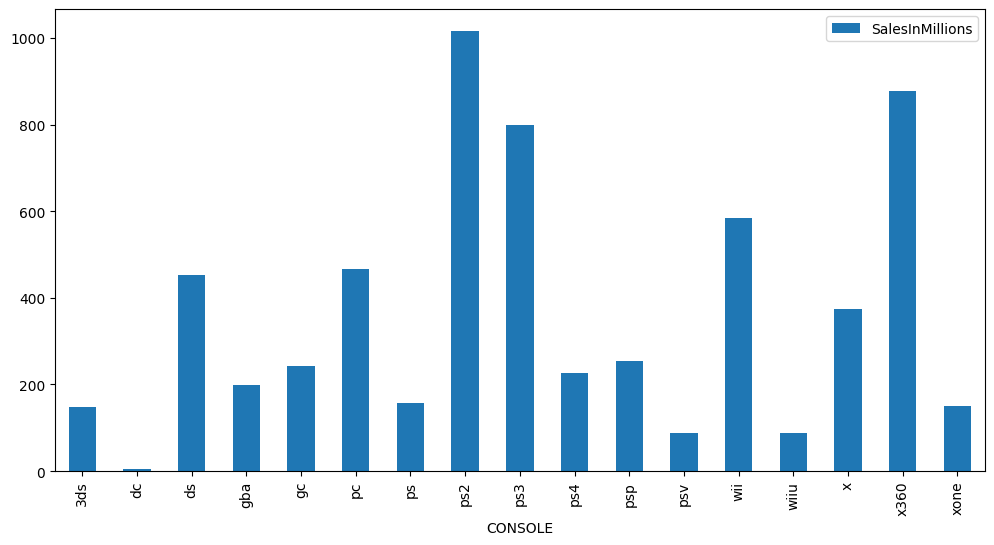

In [22]:
df.plot.bar(figsize=(12, 6))

**💡Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi untuk platform PS3, diikuti oleh Xbox360.

In [23]:
df = pd.DataFrame(train.groupby(['YEAR']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='YEAR'>

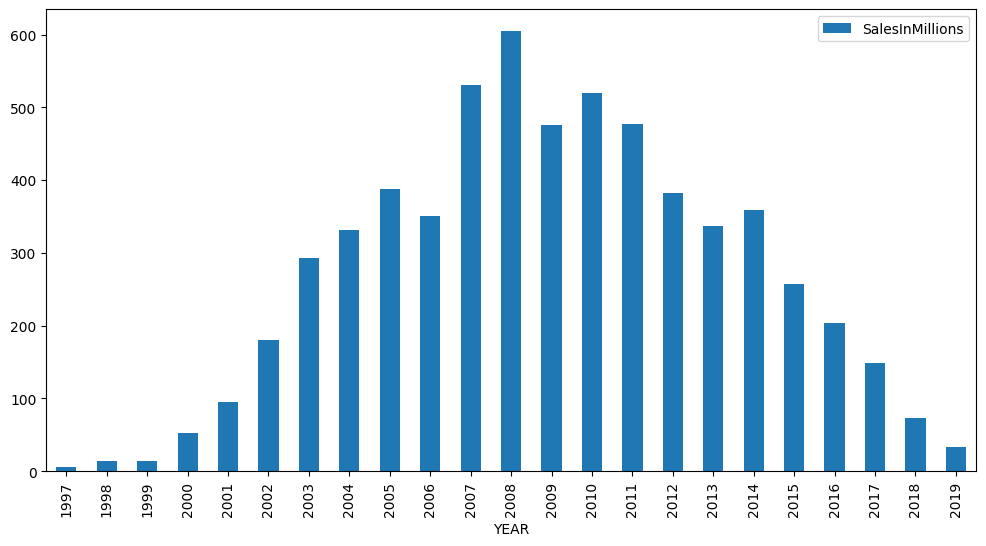

In [24]:
df.plot.bar(figsize=(12, 6))

**💡
Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi pada tahun 2010.

In [25]:
df = pd.DataFrame(train.groupby(['CATEGORY']).agg({'SalesInMillions': 'sum'}))

<Axes: xlabel='CATEGORY'>

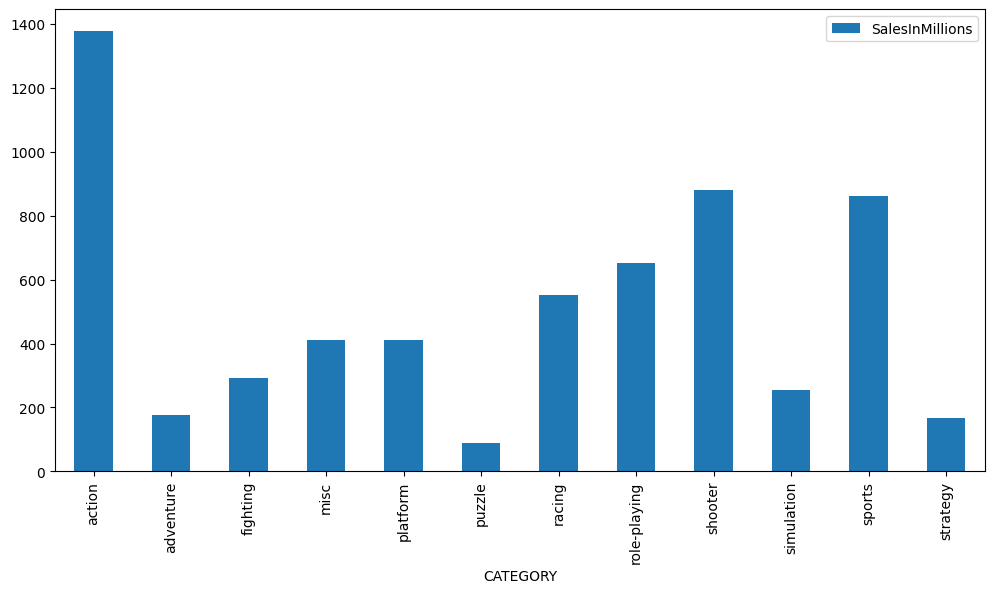

In [26]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  
Dari grafik di atas, kita dapat melihat bahwa penjualan tertinggi terjadi untuk genre aksi.


# Model training

In [27]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00


In [28]:
import catboost as cat
cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
features = list(set(train.columns)-set(['SalesInMillions']))
target = 'SalesInMillions'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

Kode tersebut menggunakan library CatBoost untuk melatih model regresi guna memprediksi nilai target berdasarkan sejumlah fitur dalam dataset. Mari kita uraikan kode tersebut langkah demi langkah:

1. **Import Library CatBoost:**
   ```python
   import catboost as cat
   ```
   Baris ini mengimpor library CatBoost dan memberikan alias `cat` untuk memudahkan pemanggilan fungsi dan kelas dari library tersebut. CatBoost adalah library machine learning yang efisien dan efektif untuk membangun model boosting, terutama untuk data kategorikal.

2. **Menentukan Fitur Kategorikal:**
   ```python
   cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
   ```
   Daftar `cat_feat` ini mendefinisikan kolom-kolom dalam dataset yang merupakan fitur kategorikal. Fitur-fitur ini akan diperlakukan secara khusus oleh CatBoost untuk meningkatkan kinerja model.

3. **Menentukan Fitur untuk Pelatihan:**
   ```python
   features = list(set(train.columns)-set(['SalesInMillions']))
   ```
   Baris ini menentukan fitur-fitur yang akan digunakan untuk melatih model dengan mengambil semua kolom dari DataFrame `train` kecuali kolom `SalesInMillions`. `SalesInMillions` adalah kolom target yang nilai-nilainya ingin diprediksi, sehingga tidak diikutsertakan dalam fitur.

4. **Menentukan Target:**
   ```python
   target = 'SalesInMillions'
   ```
   Variabel `target` menentukan kolom target dalam dataset, yaitu `SalesInMillions`, yang merupakan nilai yang akan diprediksi oleh model.

5. **Inisialisasi Model CatBoostRegressor:**
   ```python
   model = cat.CatBoostRegressor(random_state=100, cat_features=cat_feat, verbose=0)
   ```
   Baris ini membuat instance dari `CatBoostRegressor`, yang merupakan model regresi dari CatBoost. Parameter `random_state` digunakan untuk memastikan reproducibility, `cat_features` menunjukkan fitur-fitur kategorikal yang telah didefinisikan, dan `verbose=0` mengatur level logging untuk menghindari cetak log yang berlebihan selama pelatihan.

6. **Pelatihan Model:**
   ```python
   model.fit(train[features], train[target])
   ```
   Metode `fit` digunakan untuk melatih model dengan data. `train[features]` merujuk pada DataFrame yang hanya berisi fitur-fitur yang telah didefinisikan, dan `train[target]` adalah seri yang berisi nilai target (`SalesInMillions`). Model ini akan belajar hubungan antara fitur dan target dengan tujuan meminimalkan kesalahan prediksi.

Secara keseluruhan, kode ini mempersiapkan dan melatih model regresi menggunakan CatBoost untuk memprediksi `SalesInMillions` berdasarkan fitur-fitur lain dalam dataset. Model ini khusus menangani fitur kategorikal dengan efektif, yang sering kali menantang dalam model machine learning lainnya.

# Model Accuracy

In [29]:
y_true= pd.DataFrame(data=test[target], columns=['SalesInMillions'])
test_temp = test.drop(columns=[target])

In [30]:
y_pred = model.predict(test_temp[features])

In [31]:
y_pred

array([ 3.12704874,  1.79197664, 11.61452743,  1.79289289,  1.56441879,
        2.30903219,  4.29126628,  4.43150879,  1.9093416 ,  1.77834199,
        1.65620937,  1.96623852,  1.28744162,  2.0340733 ,  1.98527999,
        1.51143078,  1.78101593,  2.10659875,  1.70188412,  2.00787557,
        2.05500162,  1.84122725,  1.73119175,  2.15425511,  1.99131018,
        1.64067097,  3.687904  ,  1.84713772,  1.81360754,  2.05894723,
        2.1620483 ,  3.08426218,  1.72262256,  1.16897377,  1.61377031,
        1.77800012,  1.87671177,  1.44300344,  1.81333338,  1.65751173,
        1.32891442,  2.2639731 ,  1.93068982,  1.74186332,  1.3505847 ,
        1.66802719,  1.70356005,  1.8288804 ,  1.69911159,  1.57685601,
        1.55470188,  1.50925457,  2.05786596,  1.6890285 ,  1.18713474,
        7.44753634,  1.73338482,  2.1843742 ,  1.74056288,  5.31851117,
        1.79134811,  2.5249396 ,  1.74321728,  3.01177951,  1.75786698,
        1.72957252,  2.60331148,  1.38256641,  1.72854064,  1.46

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

1.496984023050158


In [33]:
import pickle
filename = 'finalized_model.sav'

In [34]:
pickle.dump(model, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))

In [36]:
test_temp[features].head(1)

,CRITICS_POINTS,USER_POINTS,CONSOLE,PUBLISHER,CATEGORY,RATING,YEAR
3272,2.806452,0.009848,ps3,Take-Two Interactive,shooter,M,2015


Kode `test_temp[features].head(1)` dalam Python, biasanya digunakan dalam konteks analisis data atau pemrosesan data dengan pandas, melakukan beberapa operasi yang spesifik:

1. **Seleksi Kolom dengan Menggunakan Variabel `features`:**
   - `test_temp[features]` memilih sejumlah kolom dari DataFrame `test_temp` berdasarkan daftar kolom yang disimpan dalam variabel `features`. Variabel `features` ini biasanya adalah sebuah list yang berisi nama-nama kolom yang ingin dianalisis atau diproses. Operasi ini menghasilkan DataFrame baru yang hanya berisi kolom-kolom tersebut.

2. **Mengambil Baris Pertama dari DataFrame yang Dipilih:**
   - `.head(1)` digunakan untuk mengambil baris teratas dari DataFrame yang telah dipilih kolomnya. Fungsi `head()` tanpa parameter secara default mengembalikan 5 baris pertama dari DataFrame, tetapi ketika diberikan parameter `1`, ia hanya mengembalikan 1 baris pertama. Operasi ini berguna untuk melihat atau memeriksa bagaimana data terlihat di baris pertama untuk kolom-kolom tertentu.

Jadi, secara keseluruhan, `test_temp[features].head(1)` digunakan untuk memeriksa bagaimana tampilan data pada baris pertama untuk set kolom tertentu yang ditentukan dalam `features` dari DataFrame `test_temp`. Ini sering dilakukan untuk memastikan bahwa operasi pemilihan kolom telah berhasil, untuk memverifikasi jenis data, atau untuk mendapatkan pemahaman cepat tentang nilai-nilai yang terkandung dalam baris pertama dari kolom-kolom tersebut.

In [37]:
loaded_model.predict(test_temp[features].head(1))

array([3.12704874])

Kode `loaded_model.predict(test_temp[features].head(1))` melakukan prediksi menggunakan model yang telah diload atau dimuat sebelumnya, berdasarkan sebagian data dari sebuah DataFrame. Mari kita uraikan kode tersebut menjadi beberapa bagian untuk memahami maksudnya:

1. **`loaded_model`**:
   - `loaded_model` merujuk pada sebuah model yang telah diload ke dalam memori. Model ini bisa jadi adalah model machine learning yang sebelumnya telah dilatih dan disimpan (misalnya, menggunakan `pickle` atau library serupa), kemudian dimuat kembali untuk digunakan dalam membuat prediksi. Model ini dapat berupa model regresi, klasifikasi, clustering, atau jenis model lainnya tergantung pada kasus penggunaan.

2. **`test_temp[features]`**:
   - Ini adalah operasi pemilihan kolom pada DataFrame `test_temp` berdasarkan daftar kolom yang disimpan dalam variabel `features`. Variabel `features` ini berisi nama-nama kolom yang digunakan sebagai fitur untuk model dalam membuat prediksi. Dengan kata lain, ini menentukan data apa yang akan digunakan oleh model untuk membuat prediksi.

3. **`.head(1)`**:
   - `.head(1)` digunakan untuk mengambil baris pertama dari DataFrame yang telah dipilih kolomnya. Ini berarti bahwa prediksi akan dilakukan hanya pada satu sampel data (baris pertama dari set fitur yang dipilih).

4. **`predict()`**:
   - `predict()` adalah metode yang digunakan oleh `loaded_model` untuk melakukan prediksi berdasarkan data yang diberikan. Metode ini menerima input dalam bentuk array atau DataFrame yang berisi data fitur, dan mengembalikan output prediksi. Dalam konteks ini, outputnya adalah prediksi yang dibuat oleh model berdasarkan fitur dari baris pertama DataFrame `test_temp`.

Secara keseluruhan, `loaded_model.predict(test_temp[features].head(1))` berarti "gunakan `loaded_model` untuk membuat prediksi berdasarkan fitur-fitur yang diambil dari baris pertama `test_temp`." Ini merupakan langkah umum dalam workflow machine learning, di mana model yang telah dilatih digunakan untuk membuat prediksi tentang data baru.

Output `array([3.12704874])` yang Anda sebutkan merupakan hasil dari pemanggilan metode `predict()` pada `loaded_model` menggunakan sebagian data dari DataFrame `test_temp`. Dalam konteks machine learning, ini menunjukkan nilai prediksi yang dihasilkan oleh model tersebut berdasarkan input yang diberikan. Mari kita uraikan maknanya:

1. **Format Output**: Output tersebut dikemas dalam sebuah array NumPy, yang menunjukkan bahwa metode `predict()` mengembalikan nilai dalam format yang mudah digunakan dan diolah dalam konteks komputasi ilmiah dan analisis data. NumPy arrays adalah struktur data utama yang digunakan untuk manipulasi numerik dalam Python.

2. **Nilai Prediksi**: Nilai `3.12704874` dalam array adalah nilai prediksi yang dihasilkan oleh model. Makna spesifik dari nilai ini tergantung pada konteks aplikasi model tersebut:
   - Jika model adalah **model regresi**, nilai ini mewakili prediksi kuantitatif untuk variabel dependen. Misalnya, jika Anda memprediksi harga rumah, nilai ini bisa mewakili harga rumah dalam satuan tertentu (seperti ribuan atau jutaan dolar) berdasarkan fitur-fitur yang diinputkan ke dalam model.
   - Jika model adalah **model klasifikasi** dan dirancang untuk mengembalikan probabilitas kelas (dalam kasus regresi logistik, misalnya), nilai ini bisa mewakili probabilitas bahwa sampel input termasuk dalam kelas tertentu.

3. **Single Sample Prediction**: Fakta bahwa outputnya adalah array dengan satu elemen menunjukkan bahwa prediksi ini dibuat untuk satu sampel data saja. Ini sesuai dengan penggunaan `.head(1)` pada input, yang berarti hanya baris pertama dari dataset `test_temp` yang dipilih sebagai input untuk model.

Secara keseluruhan, `array([3.12704874])` sebagai output dari `loaded_model.predict(test_temp[features].head(1))` mengindikasikan bahwa model telah menganalisis fitur dari satu sampel data dan menghasilkan prediksi 3.12704874 sebagai responsnya. Interpretasi spesifik dari prediksi ini bergantung pada konteks model dan domain aplikasinya.